## Question 1

In [4]:
#----------------------QUICK SORT--------------------------------------

def quick_sort(lst, s, e):
    if s < e:
        pi = partition(lst, s, e)
        quick_sort(lst, s, pi - 1)
        quick_sort(lst, pi + 1, e)

def partition(lst, low, high):
    pivot = lst[high]
    i = low - 1
    for j in range(low, high):
        if lst[j] <= pivot:
            i += 1
            lst[i], lst[j] = lst[j], lst[i]
    lst[i + 1], lst[high] = lst[high], lst[i + 1]
    return i + 1
    
# ------------------MERGE SORT-----------------------------------------------

def merge(left, right):
    result = []
    i = 0
    j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    return result

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

# -----------------------INSERTION SORT -------------------------

def insertion_sort(A):
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
    while j >= 0 and A[j] > key:
        A[j + 1] = A[j]
        j -= 1
        A[j + 1] = key
    return A

[0.0010135173797607422, 0.006556034088134766, 0.646773099899292, 2.3402252197265625, 4.313148021697998, 6.085251092910767]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.015621662139892578, 0.01662445068359375, 0.03463006019592285, 0.031230926513671875]


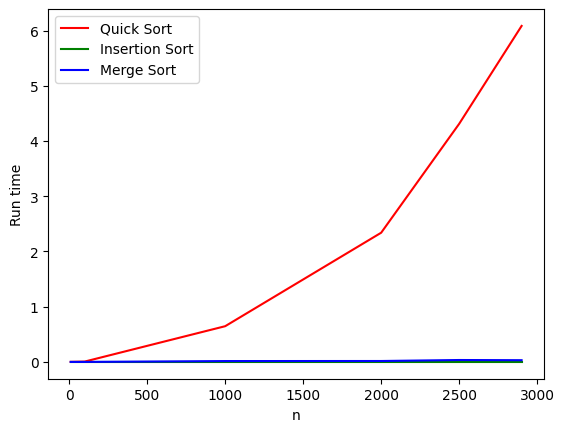

In [5]:
import numpy as np
import time
from matplotlib import pyplot as plot

sizes = [10, 100, 1000, 2000, 2500, 2900]
quicksort_times = []
mergesort_times = []
insertionsort_times = []


for size in sizes:
    s = np.arange(1,size)

    start = time.time()
    quick_sort(s, 0, len(s)-1)
    quicksort_times.append((time.time())-start)

    start = time.time()
    merge_sort(s)
    mergesort_times.append((time.time())-start)

    start = time.time()
    insertion_sort(s)
    insertionsort_times.append((time.time())-start)

print(quicksort_times)
print(insertionsort_times)
print(mergesort_times)

quicksort = np.array(list((quicksort_times)))
insertion = np.array(list((insertionsort_times)))
mergesort = np.array(list((mergesort_times)))

# Create the plot
plot.plot(sizes, quicksort, label = "Quick Sort", color = "r")
plot.plot(sizes, insertion, label = "Insertion Sort", color = "g")
plot.plot(sizes, mergesort, label = "Merge Sort", color = "b")
plot.legend()
plot.xlabel("n")
plot.ylabel("Run time")
plot.show()

# The quick sort algorithm crashes when the input size is 3000, so I am going to do a different graph that includes only merge and insertion sort

[0.0, 0.0, 0.0, 0.0, 0.18015623092651367, 0.388364315032959]
[0.0023441314697265625, 0.0008404254913330078, 0.005011796951293945, 0.06040334701538086, 14.872772455215454, 15.904759407043457]


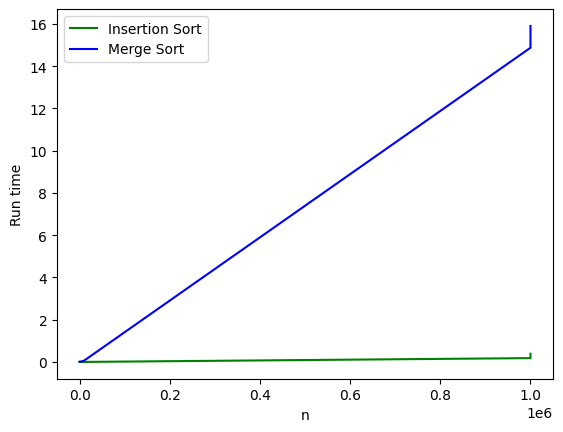

In [6]:
import numpy as np
import time
from matplotlib import pyplot as plot

sizes = [10, 100, 1000, 10000, 1000000, 1000000]
mergesort_times = []
insertionsort_times = []

for size in sizes:
    s = np.arange(1,size)

    start = time.time()
    merge_sort(s)
    mergesort_times.append((time.time())-start)

    start = time.time()
    insertion_sort(s)
    insertionsort_times.append((time.time())-start)

print(insertionsort_times)
print(mergesort_times)

insertion = np.array(list((insertionsort_times)))
mergesort = np.array(list((mergesort_times)))

# Create the plot
plot.plot(sizes, insertion, label = "Insertion Sort", color = "g")
plot.plot(sizes, mergesort, label = "Merge Sort", color = "b")
plot.legend()
plot.xlabel("n")
plot.ylabel("Run time")
plot.show()

In [8]:
# With these vaues, it is very clear that mergesort is less efficient than insertion sort
# Insertion sort is the least costly way to sort an already sorted array

## Question 2

In [7]:
def recursive_quick_sort(arr):
    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]

        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    quick_sort_helper(arr, 0, len(arr) - 1)


In [8]:
def iterative_quick_sort(arr):
    # Create a stack for storing start and end indices
    stack = [(0, len(arr) - 1)]

    while stack:
        # Pop the start and end indices
        low, high = stack.pop()

        if low < high:
            # Partition the array and get the pivot index
            pi = partition(arr, low, high)

            # Push the indices of the subarrays to be sorted
            stack.append((low, pi - 1))
            stack.append((pi + 1, high))

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

[0.0, 0.0, 0.01611948013305664, 0.03128528594970703, 0.04687047004699707, 0.0, 0.0312504768371582]
[0.0, 0.00450897216796875, 0.6748270988464355, 2.8072946071624756, 4.698627710342407, 5.01228141784668, 5.198000907897949]


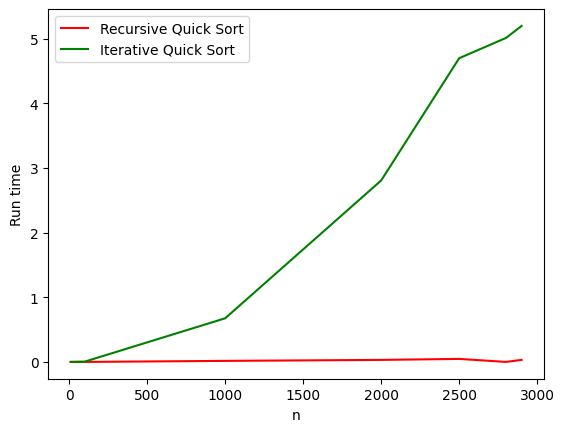

In [9]:
import numpy as np
import time
from matplotlib import pyplot as plot

sizes = [10, 100, 1000, 2000, 2500, 2800, 2900]
quicksort_times = []
iterative_quicksort_times = []

for list_size in sizes:
    s = np.random.randint(0,1000, size=list_size)
    n = s
    
    start = time.time()
    recursive_quick_sort(s)
    quicksort_times.append((time.time())-start)

    start = time.time()
    iterative_quick_sort(n)
    iterative_quicksort_times.append((time.time())-start)

print(quicksort_times)
print(iterative_quicksort_times)

recur = np.array(list((quicksort_times)))
itera = np.array(list((iterative_quicksort_times)))

# Create the plot
plot.plot(sizes, recur, label = "Recursive Quick Sort", color = "r")
plot.plot(sizes, itera, label = "Iterative Quick Sort", color = "g")
plot.legend()
plot.xlabel("n")
plot.ylabel("Run time")
plot.show()

The graph shows iterative quicksort being less efficient than recursive quicksort

## Question 3

In [15]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-1): 
            # changed from (n-i-3) to just (n-1)
            
            if arr[j] > arr[j+1]: 
            # changed the direction of the inequality, so it checks if the first element is greater than the one following it
                # Swap the elements
                arr[j], arr[j+1] = arr[j+1], arr[j]

# Test the implementation with an example
array = [64, 34, 25, 12, 22, 11, 90]
array1 = [5,46,46,2,12,12,195,71,71] # array containing duplicates
array2 = [1,2,3,4,5,6,7,8,9,10] # already sorted array
array3 = [10,9,8,7,6,5,4,3,2,1] # array sorted highest to lowest

bubble_sort(array)
bubble_sort(array1)
bubble_sort(array2)
bubble_sort(array3)

print("Sorted array is:", array)
print("Sorted array 1 is:", array1)
print("Sorted array 2 is:", array2)
print("Sorted array 3 is:", array3)

Sorted array is: [11, 12, 22, 25, 34, 64, 90]
Sorted array 1 is: [2, 5, 12, 12, 46, 46, 71, 71, 195]
Sorted array 2 is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Sorted array 3 is: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### REVIEWING THE PROVIDED BUBBLE SORT

OUTPUT: Sorted array is: [64, 34, 25, 22, 12, 11, 90]
this array is clearly not sorted properly so there is a problem with the code, 90 should be at the beginning, and also,
this is sorted highest to lowest, and it should be sorted lowest to highest

### IDENTIFY AND FIX MISTAKES

The range was incorrect, and the inequality operator was facing the wrong direction, both mistakes were pointed out with comments
in the code above, and fixed accordingly

### TEST THE IMPLEMENTATION

With the changes made, the original test case now outputs 
Sorted array is: [11, 12, 22, 25, 34, 64, 90]
This is correctly sorted, therefore our changes were correct
tested with some other arrays, as shown in the code (all arrays output as expected)

## Question 4

In [42]:
import random

#--------------------------FIRST ELEMENT PIVOT------------------------------------#

def quick_sort_first(arr):
    """ quick sort algorithm that uses the first element as a pivot """
    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition_first(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    def partition_first(arr, low, high):
        pivot = arr[low]
        i = low + 1
        j = high

        while True:
            while i <= j and arr[i] <= pivot:
                i += 1
            while i <= j and arr[j] >= pivot:
                j -= 1
            if i <= j:
                arr[i], arr[j] = arr[j], arr[i]
            else:
                break

        arr[low], arr[j] = arr[j], arr[low]
        return j

    quick_sort_helper(arr, 0, len(arr) - 1)
    
#--------------------------MEDIAN OF THREE PIVOT------------------------------------#

def quick_sort_median_of_three(arr):
    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition_median_of_three(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    def partition_median_of_three(arr, low, high):
        mid = (low + high) // 2
        pivot_candidates = [(low, arr[low]), (mid, arr[mid]), (high, arr[high])]
        pivot_candidates.sort(key=lambda x: x[1])
        pivot_index = pivot_candidates[1][0]
        
        arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
        return partition_first(arr, low, high)

    def partition_first(arr, low, high):
        pivot = arr[high]
        i = low - 1

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]

        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    quick_sort_helper(arr, 0, len(arr) - 1)

#--------------------------RANDOM PIVOT------------------------------------#

def quick_sort_random(arr):
    """ quick sort algorithm that selects a random pivot """
    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition_random(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    def partition_random(arr, low, high):
        pivot_index = random.randint(low, high)
        arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
        return partition_first(arr, low, high)

    def partition_first(arr, low, high):
        pivot = arr[high]
        i = low - 1

        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]

        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    quick_sort_helper(arr, 0, len(arr) - 1)



[0.0, 0.0, 0.01427149772644043, 0.038996219635009766, 0.015026092529296875, 0.06397032737731934, 0.049077510833740234, 0.0529782772064209, 0.10228848457336426, 0.07798242568969727, 0.1398000717163086, 0.043998003005981445, 0.17398786544799805, 0.21738195419311523, 0.2389998435974121, 0.31299352645874023, 0.371997594833374, 0.2599971294403076, 0.5539875030517578, 0.6791765689849854, 0.5094830989837646, 0.8903312683105469, 0.9621846675872803]
[0.0, 0.002104520797729492, 0.018001794815063477, 0.03796720504760742, 0.05200815200805664, 0.06902790069580078, 0.07000565528869629, 0.09200072288513184, 0.10496664047241211, 0.13400030136108398, 0.06699657440185547, 0.09972977638244629, 0.18601012229919434, 0.2089989185333252, 0.27500057220458984, 0.3320305347442627, 0.3490447998046875, 0.4722461700439453, 0.4114706516265869, 0.5260040760040283, 0.7303307056427002, 0.981032133102417, 1.2331504821777344]
[0.001070261001586914, 0.0012068748474121094, 0.022032976150512695, 0.03399801254272461, 0.0740

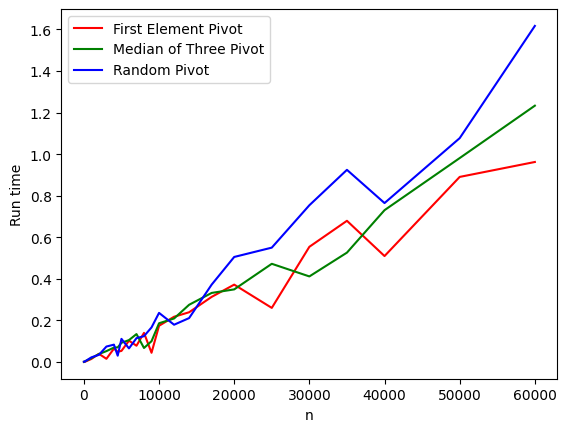

In [43]:
import numpy as np
import time
from matplotlib import pyplot as plot

sizes = [10, 100, 1000, 2000, 3000, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 17000, 20000, 25000, 30000, 35000,
        40000, 50000, 60000]
first_times = []
median_times = []
random_times = []

for list_size in sizes:
    s = np.random.randint(0,40000, size=list_size)
    n = s
    r = s
    
    start = time.time()
    quick_sort_first(s)
    first_times.append((time.time())-start)

    start = time.time()
    quick_sort_median_of_three(n)
    median_times.append((time.time())-start)

    start = time.time()
    quick_sort_random(r)
    random_times.append((time.time())-start)

print(first_times)
print(median_times)
print(random_times)

first = np.array(list((first_times)))
median = np.array(list((median_times)))
random = np.array(list((random_times)))

# Create the plot
plot.plot(sizes, first, label = "First Element Pivot", color = "r")
plot.plot(sizes, median, label = "Median of Three Pivot", color = "g")
plot.plot(sizes, random, label = "Random Pivot", color = "b")
plot.legend()
plot.xlabel("n")
plot.ylabel("Run time")
plot.show()

The graph shows that first element pivot is the fastest, median of three pivot is the second most efficient, and random pivot is the least efficient